In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam1.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.shape

(5572, 5)

In [6]:
#the unnamed:2 , unnamed:3 and unnamed:4 columns are all mostly null so lets delete it.....
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [9]:
df.head(1)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."


In [10]:
df['Target'].value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

In [11]:
#In target column ham == Not a spam and Spam == Spam 
# So converting ham and spam to numbers as 0 and 1 

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lb = LabelEncoder()

In [14]:
df['Target']=lb.fit_transform(df['Target'])

In [15]:
df.head(3) # As u can see we have converted ham as 0 and spam as 1

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [16]:
df.duplicated().sum() #there are 403 duplicate rows , so deleting it

403

In [17]:
df=df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
import seaborn as sb 
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Target'>

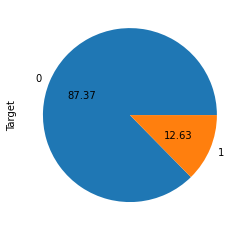

In [20]:
df['Target'].value_counts().plot(kind='pie' , autopct='%0.2f')

In [21]:
#Our dataset contains imbalance it has majority of not spam messages...

In [38]:
!pip install nltk

In [22]:
import nltk  #It is one of the best libraries to work on natural language processing

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['Text'].apply(len)

In [25]:
df.head(3)

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [26]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df['num_sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.sample(5)

,Target,Text,num_characters,num_words,num_sentence
2432,0,Really dun bluff me leh... U sleep early too. ...,53,13,2
1834,0,I have a rather prominent bite mark on my righ...,53,11,1
1430,0,Don't look back at the building because you ha...,141,36,3
5313,0,My sister going to earn more than me da.,40,10,1
4506,0,He neva grumble but i sad lor... Hee... Buy tm...,149,40,4


In [29]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#From above we can see that there is a messages which is having 
#38 sentence so basically it is an outlier 

In [31]:
df[df['Target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['Target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
#from above 2 tables we can see that the spam messages are generally longer as there are 
#averge of 2.96 sentences in them whereas the not spam messages have 1.81 sentences

<AxesSubplot:>

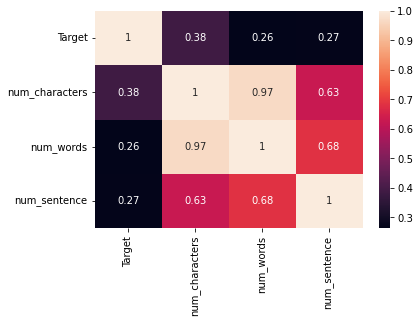

In [34]:
sb.heatmap(df.corr(),annot=True)

In [55]:
#oh my god we have multicollinearity (high correlation between independent columns)
# so we will drop the two other columns which we have created and will use only num_characters as it has high corr with target 

In [35]:
df.drop(columns=['num_sentence','num_words'],inplace=True)

In [36]:
df.head(1)

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111


In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
import string

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [48]:
def transform_text(text):
    text = text.lower() # Making the alphabets in lower case 
    text = nltk.word_tokenize(text) #Splitting the message in words
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i) #Taking only alphabets 
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) #removing the punctuation marks from our text.....
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i)) # Stemming the words means Loved will become love , dancing = dance and so on .......
    
            
    return " ".join(y) #joining the words again to form the text

In [49]:
transform_text("Hi!!! Om Brother how are you ? I Liked the IPL Match today what about you ?" )

'hi om brother like ipl match today'

In [50]:
#So creating a new column Transformed_Text by passing our text of each row in text column to above function 
df['Transformed_text']=df['Text'].apply(transform_text)

In [51]:
df.head()

,Target,Text,num_characters,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [62]:
# So lets build the model

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
tfidf = TfidfVectorizer(max_features=3000) #used to convert text to numbers

In [67]:
X = tfidf.fit_transform(df['Transformed_text']).toarray() # converting our Transformed_text as numbers

In [68]:
X.shape

(5169, 3000)

In [69]:
y=df['Target'].values

In [70]:
from sklearn.model_selection import train_test_split # Splitting our data set into 2 parts.....
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import MultinomialNB # Naive_bayes is one of the best on textual processing that's why we have used it
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [73]:
mnb = MultinomialNB()

In [76]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("Precision :" , precision_score(y_test,y_pred))

Accuracy :  0.9709864603481625
Precision : 1.0


In [77]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))